## Observations and Insights 

1) mice were mostly evenly distributed among males and females.

2) "ramicane" seemed to be the most effective drug with the lowest average tumor volumes, closely followed by "capomulin".

3) there was a very weak positive correlation between mouse weight in grams vs. tumor volume in cubic mm.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import display

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge (study_results, mouse_metadata, how = 'left', on = "Mouse ID")

study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice in the DataFrame.

#use value counts to find mouse w/ highest number of rows & total length; alternatively could use len(df.unique())
mice_count = study_df["Mouse ID"].value_counts()
mice_count

g989    13
a644    10
t724    10
k483    10
c264    10
        ..
n482     1
d133     1
o848     1
u153     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#use nested duplicated fxn to return duplicated rows
duplicates_df = study_df[study_df.duplicated(["Mouse ID","Timepoint"])]
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID.

#mouse g989 identified as duplicate; use locate fxn to pull relevant rows
g989_df = study_df.loc [study_df["Mouse ID"] == "g989", :]
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#drop duplicated rows
fixed_df = study_df.loc [study_df["Mouse ID"] != "g989", :]
fixed_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.

#confirm that unit g989 is gone from the top, length is shorter by 1
new_mice_count = fixed_df["Mouse ID"].value_counts()
new_mice_count

c832    10
t724    10
c264    10
f345    10
v923    10
        ..
f932     1
d133     1
o848     1
u153     1
v199     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

#group dataframe by drug
drug_groups = fixed_df.groupby ("Drug Regimen")

#calculate each value, round to 2 decimal places
drug_mean = round (drug_groups["Tumor Volume (mm3)"].mean(), 2)
drug_median = round (drug_groups["Tumor Volume (mm3)"].median(), 2)
drug_variance = round (drug_groups["Tumor Volume (mm3)"].var(), 2)
drug_stdev = round (drug_groups["Tumor Volume (mm3)"].std(), 2)
drug_sem = round (drug_groups["Tumor Volume (mm3)"].sem(), 2)

#create dataframe
summary_df = pd.DataFrame ({"mean": drug_mean,
                           "median": drug_median,
                           "variance": drug_variance,
                           "std dev": drug_stdev,
                           "SEM": drug_sem})

summary_df

,mean,median,variance,std dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

#use grouped drug variable from previous cell; use "agg" fxn to summon select measures of central tendency
round (drug_groups['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']), 2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

select a drug: type 'Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn', 
'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', or 'Ceftamin'. ketapril


Text(0, 0.5, '# of mice')

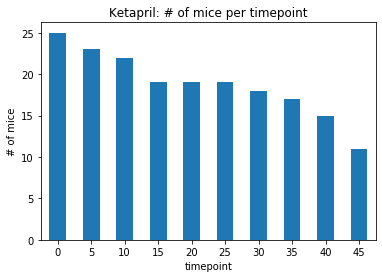

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#ask for input of drug name to return data for; drug list pulled from .unique() fxn
drug_input = input ("""select a drug: type 'Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn', 
'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', or 'Ceftamin'. """)

#convert input to proper capitalization if necessary
drug_input_case = drug_input.lower().title()

#locate data on selected drug, group by timepoint, & count number of mice per timepoint
drug_input_df = fixed_df.loc [fixed_df['Drug Regimen'] == drug_input_case, :]
drug_freq_groups = drug_input_df.groupby (['Timepoint'])
drug_freq_count = drug_freq_groups['Mouse ID'].count()

#populate dataframe w/ series
drug_freq_df = pd.DataFrame (drug_freq_count)

#create bar chart w/ pandas plot, populate title w/ drug input
drug_freq_df.plot.bar(title = f"{drug_input_case}: # of mice per timepoint",
                       rot = 0,
                       legend = False)

#label axes, adjust xtick rotation
plt.xlabel ('timepoint')
plt.ylabel ('# of mice')


([<matplotlib.axis.XTick at 0x20575e999b0>,
 <a list of 10 Text xticklabel objects>)

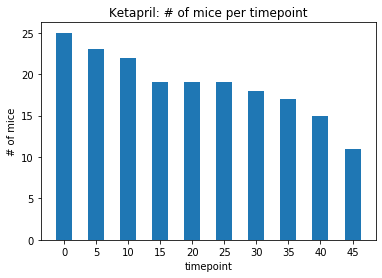

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#create list of timepoints from above series
timepoints = drug_freq_count.index

#create list of bar widths to be assigned to bar chart
x = 2.5
bar_width = [x,x,x,x,x,x,x,x,x,x]

#create bar chart w/ matplotlib
plt.bar (timepoints, drug_freq_count, width = bar_width, align = 'center')

#label title & axes
plt.title (f'{drug_input_case}: # of mice per timepoint')
plt.xlabel ('timepoint')
plt.ylabel ('# of mice')

#make all x-axis ticks visible
bar_ticks = [x for x in timepoints]
plt.xticks (bar_ticks)

## Pie Plots

(-1.1041200173094385,
 1.1079114197007642,
 -1.1065502689644005,
 1.1003119175697333)

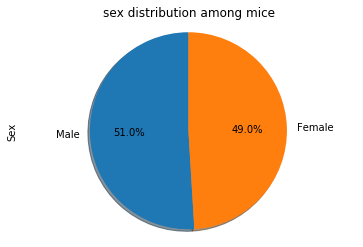

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#create series of gender sample sizes
sex_dist = fixed_df["Sex"].value_counts()

#create pie chart w/ pandas plot
sex_dist.plot.pie (title = "sex distribution among mice",
                   autopct = "%1.1f%%",
                   shadow = True,
                   startangle = 90)

#display an evenly round chart
plt.axis ("equal")

(-1.1041200173094385,
 1.1079114197007642,
 -1.1065502689644005,
 1.1003119175697333)

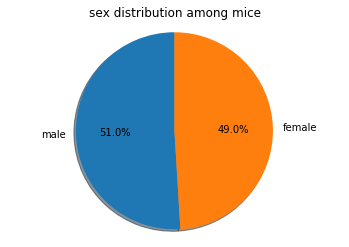

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#create pie chart w/ matplotlib using previously created series
plt.pie (sex_dist,
         labels = ['male', 'female'],
         autopct = "%1.1f%%",
         shadow = True,
         startangle = 90)

#add title, display an evenly round chart
plt.title ("sex distribution among mice")
plt.axis ("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#sort original data by timepoint
best_tx_df = fixed_df.sort_values (by = ['Timepoint'])

#keep data only on the last timepoint per mouse
best_tx_df = best_tx_df.drop_duplicates (subset = 'Mouse ID', keep = 'last')

#exclude mice that didn't undergo treatment
best_tx_df = best_tx_df.loc [best_tx_df['Timepoint'] != 0, :]

# #populate list of most top 4 effective treatments based on average tumor volume at each mouse's final timepoint
# best_tx_mean = best_tx_df.groupby ('Drug Regimen')['Tumor Volume (mm3)'].mean().sort_values ()
# best_tx_list = best_tx_mean[0:4].index
# #returns ('Ramicane', 'Capomulin', 'Propriva', 'Infubinol')

#list of 'top' drugs provided from new instructions (rather than what was calculated in above comments)
best_tx_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#isolate data for 4 best drugs 
best_tx_df = best_tx_df.loc [(best_tx_df['Drug Regimen'] == best_tx_list[0])|
                             (best_tx_df['Drug Regimen'] == best_tx_list[1])|
                             (best_tx_df['Drug Regimen'] == best_tx_list[2])|
                             (best_tx_df['Drug Regimen'] == best_tx_list[3]), :]


In [14]:
#create lists for quartiles, IQR, lower/upper bounds
lowerqs = []
upperqs = []
iqrs = []
lowerbounds = []
upperbounds = []

#begin loop through top 4 drugs, calculate & append boxplot values to above lists
for tx in best_tx_list:
    quartiles = best_tx_df.loc [(best_tx_df['Drug Regimen'] == tx), 'Tumor Volume (mm3)'].quantile ([.25,.5,.75])
    lowerq = round (quartiles[0.25], 2)
    upperq = round (quartiles[0.75], 2)
    iqr = round ((upperq - lowerq), 2)
    
    lowerqs.append (lowerq)
    upperqs.append (upperq)
    iqrs.append (iqr)
    
    lowerbound = round (lowerq - (1.5 * iqr), 2)
    upperbound = round (upperq + (1.5 * iqr), 2)
    
    lowerbounds.append (lowerbound)
    upperbounds.append (upperbound)

#create dataframe from boxplot measures for each drug
boxplot_df = pd.DataFrame ({'drug regimen': best_tx_list,
                            'lower quartile': lowerqs,
                            'upper quartile': upperqs,
                            'IQR': iqrs,
                            'lower boundary': lowerbounds,
                            'upper boundary': upperbounds})

boxplot_df

,drug regimen,lower quartile,upper quartile,IQR,lower boundary,upper boundary
0,Capomulin,32.38,40.16,7.78,20.71,51.83
1,Ramicane,31.56,40.66,9.10,17.91,54.31
2,Infubinol,54.05,65.53,11.48,36.83,82.75
3,Ceftamin,56.06,64.63,8.57,43.20,77.48


In [15]:
#begin loop through top 4 drugs to identify outliers
for x in range(len(best_tx_list)):
    outliers = best_tx_df.loc [(best_tx_df['Drug Regimen'] == best_tx_list[x]), :]
    outliers = outliers.loc [(outliers['Tumor Volume (mm3)'] < lowerbounds[x])|
                             (outliers['Tumor Volume (mm3)'] > upperbounds[x]), :]
    
    #display dataframe w/ outliers for each drug (if any) using IPython.display
    display (outliers)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
420,c326,5,36.321346,0,Infubinol,Female,18,25


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


Text(0, 0.5, 'tumor volume (mm3)')

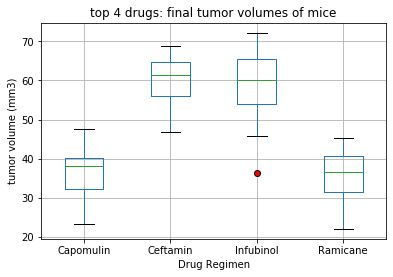

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# #create boxplot w/ pandas plot for combined data
# boxplot_all = best_tx_df['Tumor Volume (mm3)'].plot.box (title = 'top 4 drugs: final tumor volumes of mice',
#                                                          grid = True)

#create 4 adjacent boxplots grouped by drug, denote outliers in red
boxplot_drug = best_tx_df.boxplot (column = 'Tumor Volume (mm3)',
                                  by = 'Drug Regimen',
                                  flierprops = dict(markerfacecolor = 'r', marker = 'o'),
                                  grid = True)

#change title, delete extraneous title, add y-axis label
plt.title ('top 4 drugs: final tumor volumes of mice')
plt.suptitle ('')
plt.ylabel ('tumor volume (mm3)')

## Line and Scatter Plots

Text(0, 0.5, '# of mice')

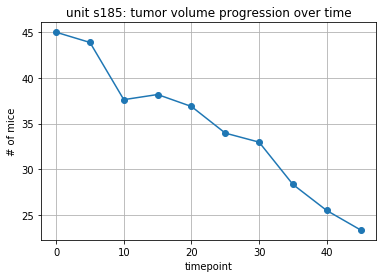

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#isolate mice treated w/ capomulin
capomulin_df = fixed_df.loc [fixed_df ['Drug Regimen'] == 'Capomulin', :]

#chose first mouse in capomulin dataframe, isolated relevant data
s185_df = capomulin_df.loc [capomulin_df ['Mouse ID'] == 's185', ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

#create line graph w/ pandas plot
s185_df.plot(x = 'Timepoint',
             y = 'Tumor Volume (mm3)',
             marker = 'o',
             title = 'unit s185: tumor volume progression over time',
             legend = False,
             grid = True)

#add axis labels
plt.xlabel ('timepoint')
plt.ylabel ('# of mice')

#alternative: plt.plot (s185_df ['Timepoint'], s185_df ['Tumor Volume (mm3)'], marker = "o")

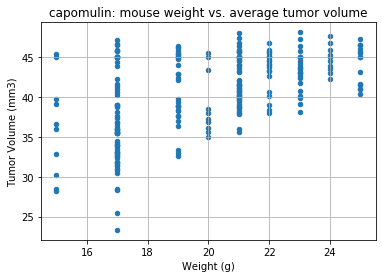

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#create scatter plot w/ pandas plot
capomulin_df.plot.scatter (x = 'Weight (g)',
                           y = 'Tumor Volume (mm3)',
                           title = 'capomulin: mouse weight vs. average tumor volume',
                           grid = True)

## Correlation and Regression

Text(22, 30, 'R-squared = 0.28')

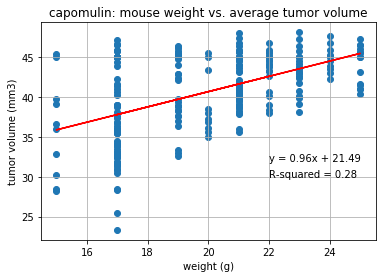

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#define x & y variables for correlation/regression calculations
coreg_x = capomulin_df['Weight (g)']
coreg_y = capomulin_df['Tumor Volume (mm3)']

#calculate correlation coefficient
corr = st.pearsonr (coreg_x, coreg_y)

#use st.linregress to calculate regression line attributes
(slope, intercept, rvalue, pvalue, stderr) = st.linregress (coreg_x, coreg_y)

#recreate scatter plot for linear regression, this time w/ matplotlib
plt.scatter (coreg_x, coreg_y)

#add title, axis labels, & grid
plt.title ('capomulin: mouse weight vs. average tumor volume')
plt.xlabel ('weight (g)')
plt.ylabel ('tumor volume (mm3)')
plt.grid ()

#plot regression line in red, display equation & r-squared
plt.plot (coreg_x, (coreg_x * slope + intercept), "r-")
plt.annotate (f'y = {round(slope, 2)}x + {round(intercept, 2)}', (22,32))
plt.annotate (f'R-squared = {round(corr[0]**2, 2)}', (22,30))